## Importamos librerías



In [1]:
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, auc
from statistics import mode
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

## Lectura y manipulación del dataset

### Lectura y selección de 10 ciudades al azar

In [57]:
data = pd.read_csv("weatherAUS.csv")
data


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [58]:
# Guardamos en una lista, las ciudades del dataset
lista_ciudades = data['Location'].unique()
# Tomamos 10 ciudades de forma aleatoria
np.random.seed(42) # Establece una semilla fija
seleccion_ciudades = np.random.choice(lista_ciudades, 10, replace=False)
seleccion_ciudades

array(['Williamtown', 'AliceSprings', 'Katherine', 'Launceston',
       'MountGinini', 'Dartmoor', 'Watsonia', 'Portland', 'Townsville',
       'Bendigo'], dtype=object)

In [59]:
#Filtramos el dataset y nos quedamos sólo con las filas correspondientes a las ciudades seleccionadas
df_clima = data[data['Location'].isin(seleccion_ciudades)]
df_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
39538,2009-01-01,Williamtown,15.2,34.0,0.0,11.6,9.2,NW,41.0,WNW,...,62.0,36.0,1005.2,1001.5,3.0,6.0,23.7,28.7,No,No
39539,2009-01-02,Williamtown,18.3,24.5,0.0,8.8,9.4,S,54.0,S,...,61.0,57.0,1012.1,1011.7,3.0,2.0,21.6,23.4,No,No
39540,2009-01-03,Williamtown,16.8,23.5,0.4,8.4,0.4,NE,37.0,ESE,...,60.0,58.0,1020.4,1018.4,7.0,7.0,20.1,21.7,No,No
39541,2009-01-04,Williamtown,17.5,27.8,0.0,5.0,12.0,E,50.0,NE,...,60.0,51.0,1018.4,1014.6,1.0,1.0,22.7,26.4,No,No
39542,2009-01-05,Williamtown,14.8,36.0,0.0,8.6,11.9,ENE,37.0,NNW,...,67.0,39.0,1013.6,1008.7,2.0,3.0,22.5,33.8,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143877,2017-06-21,Katherine,15.4,31.5,0.0,3.6,NaN,ESE,43.0,ESE,...,70.0,NaN,1016.6,1012.7,0.0,NaN,21.6,NaN,No,No
143878,2017-06-22,Katherine,12.2,31.5,0.0,4.0,NaN,ESE,37.0,SE,...,45.0,NaN,1017.1,1012.8,0.0,NaN,19.9,NaN,No,No
143879,2017-06-23,Katherine,14.9,31.5,0.0,6.4,NaN,ESE,41.0,SE,...,74.0,NaN,1016.1,1011.8,0.0,NaN,22.8,NaN,No,No
143880,2017-06-24,Katherine,14.0,NaN,0.0,10.0,NaN,E,35.0,E,...,74.0,NaN,1014.6,1011.1,2.0,NaN,22.2,NaN,No,NaN


### Análisis descriptivo y correcciones sobre algunas variables categóricas

In [60]:
#Vemos cuáles son las variables, obteniendo las columnas del dataset:
df_clima.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [61]:
#Vemos tipos de datos:
df_clima.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


La primera variable, 'date', es la fecha en la que se tomaron los datos (en formato AAAA-MM-DD). La segunda, 'Location', es la ciudad.

Luego, 'MinTemp' y 'MaxTemp', que representan las temperaturas mínimas y máximas, respectivamente, que registraron en esa fecha y ciudad.

'Rainfall' representa la cantidad de lluvia registrada, mientras que 'Evaporation', la cantidad de agua evaporada.

'Sunshine', la cantidad de tiempo de luz solar.

'WindGustDir' y 'WindGustSpeed' representan la dirección y velocidad máxima de las ráfagas de viento.

Las variables 'WindDir9am', 'WindDir3pm', 'WindSpeed9am' y 'WindSpeed3pm' representan las direcciones y velocidades del viento a las 9am y a las 3pm.

De manera similar, 'Humidity9am',	'Humidity3pm', 'Pressure9am',
Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am' y 'Temp3pm' dan humedad, presión, nubosidad y temperatura en dichos horarios.

En general, no tenemos información sobre las unidades tomadas para estas mediciones.

Por último, 'RainToday' y 'RainTomorrow' son variables categóricas, que indican si llovió o no ese mismo día y el siguiente, respectivamente.

In [62]:
# Vemos características de las variables numéricas. El rango de variación de las mismas se observa a partir de los valores min y max
df_clima.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,28576.000000,28640.000000,28084.000000,18737.000000,14632.000000,28043.000000,28494.000000,28498.000000,27982.000000,27405.000000,24514.000000,24517.000000,17919.000000,17164.000000,28212.000000,27703.000000
mean,11.085414,22.247437,2.402197,5.766686,7.417749,39.948971,13.343300,18.369429,70.997105,54.104944,1016.993681,1014.572403,4.533624,4.619786,16.014380,20.587189
std,7.100826,8.464012,8.383588,4.444280,3.894355,13.134511,8.207158,8.140635,21.508288,22.295235,7.266884,7.340365,2.939539,2.759977,7.693444,8.156476
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,1.000000,985.000000,980.200000,0.000000,0.000000,-7.200000,-5.400000
25%,6.100000,15.800000,0.000000,2.600000,4.300000,31.000000,7.000000,13.000000,59.000000,39.000000,1012.200000,1009.500000,1.000000,2.000000,10.600000,14.500000
50%,10.400000,21.400000,0.000000,5.200000,8.200000,39.000000,13.000000,19.000000,73.000000,55.000000,1017.000000,1014.500000,5.000000,5.000000,15.000000,19.800000
75%,15.700000,28.800000,0.800000,7.800000,10.700000,46.000000,19.000000,24.000000,89.000000,69.000000,1021.800000,1019.500000,7.000000,7.000000,21.600000,26.600000
max,30.300000,46.700000,236.800000,145.000000,14.300000,135.000000,65.000000,72.000000,100.000000,100.000000,1040.500000,1039.600000,8.000000,8.000000,39.100000,45.200000


In [63]:
#Vemos qué valores toman las variables categóricas:
df_clima['WindGustDir'].unique()  #Vemos que hay valores con errores y los corregimos a continuación

array(['NW', 'S', 'NE', 'E', 'ENE', 'SSW', 'ESE', nan, 'SE', 'SSE', 'N',
       'SW', 'WNW', 'W', 'WSW', 'NNW', 'NNE'], dtype=object)

In [64]:
df_clima['WindGustDir'] = df_clima['WindGustDir'].replace({'ENE': 'NE', 'SSW': 'SW', 'ESE': 'SE', 'SSE': 'SE', 'WNW': 'NW', 'WSW': 'SW', 'NNW': 'NW', 'NNE': 'NE'})

<ipython-input-64-ac07074ea0c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clima['WindGustDir'] = df_clima['WindGustDir'].replace({'ENE': 'NE', 'SSW': 'SW', 'ESE': 'SE', 'SSE': 'SE', 'WNW': 'NW', 'WSW': 'SW', 'NNW': 'NW', 'NNE': 'NE'})


In [65]:
df_clima['WindDir9am'].unique()

array(['WNW', 'S', 'ESE', 'NE', 'NNW', 'SSE', 'SSW', 'SE', 'ENE', 'N',
       'W', 'NW', 'NNE', 'SW', 'E', 'WSW', nan], dtype=object)

In [66]:
df_clima['WindDir9am'] = df_clima['WindDir9am'].replace({'ENE': 'NE', 'SSW': 'SW', 'ESE': 'SE', 'SSE': 'SE', 'WNW': 'NW', 'WSW': 'SW', 'NNW': 'NW', 'NNE': 'NE'})

<ipython-input-66-0034dd453e19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clima['WindDir9am'] = df_clima['WindDir9am'].replace({'ENE': 'NE', 'SSW': 'SW', 'ESE': 'SE', 'SSE': 'SE', 'WNW': 'NW', 'WSW': 'SW', 'NNW': 'NW', 'NNE': 'NE'})


In [67]:
df_clima['WindDir3pm'].unique()

array(['SE', 'E', 'ENE', 'ESE', 'S', 'SSE', 'WNW', 'NE', 'NNW', 'SSW',
       'NW', 'N', 'NNE', 'SW', 'W', nan, 'WSW'], dtype=object)

In [68]:
df_clima['WindDir3pm'] = df_clima['WindDir3pm'].replace({'ENE': 'NE', 'SSW': 'SW', 'ESE': 'SE', 'SSE': 'SE', 'WNW': 'NW', 'WSW': 'SW', 'NNW': 'NW', 'NNE': 'NE'})

<ipython-input-68-fbc33826ae96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clima['WindDir3pm'] = df_clima['WindDir3pm'].replace({'ENE': 'NE', 'SSW': 'SW', 'ESE': 'SE', 'SSE': 'SE', 'WNW': 'NW', 'WSW': 'SW', 'NNW': 'NW', 'NNE': 'NE'})


In [69]:
df_clima['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [70]:
df_clima['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

### Codificación de variables categóricas


In [71]:
#Codificamos variables categóricas RainToday y RainTomorrow

df_clima['RainToday'] = np.where(df_clima['RainToday'] == 'Yes', 1, 0)
df_clima['RainTomorrow'] = np.where(df_clima['RainTomorrow'] == 'Yes', 1, 0)

<ipython-input-71-a3c8b5a076be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clima['RainToday'] = np.where(df_clima['RainToday'] == 'Yes', 1, 0)
<ipython-input-71-a3c8b5a076be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clima['RainTomorrow'] = np.where(df_clima['RainTomorrow'] == 'Yes', 1, 0)


### Tratamiento de valores nulos:

In [72]:
#Eliminamos filas donde la variable respuesta tiene valores nulos:
df_clima1 = df_clima.dropna(subset=['RainTomorrow'])
df_clima1.shape #Chequeamos tamaño

(28814, 23)

In [73]:
#Vemos cantidad de valores nulos en el data set:
df_clima1.isna().sum()

,0
Date,0
Location,0
MinTemp,238
MaxTemp,174
Rainfall,730
Evaporation,10077
Sunshine,14182
WindGustDir,774
WindGustSpeed,771
WindDir9am,2263


Observamos que hay variables con gran cantidad de valores nulos, como por ejemplo la variable Sunshine, con un 48% de datos faltantes sobre el total de datos, o Cloud3pm con un 40% aprox de valores nulos. Por esto decidimos imputar las valores faltantes de las variables numéricas utilizando el método de los K-Vecinos más cercanos.

In [74]:
# Filtramos solo columnas numéricas
df_numerico = df_clima1.select_dtypes(include=[np.number])

# Aplicamos KNNImputer solo a las columnas numéricas
knn_imputer = KNNImputer()
df_numerico_imputado = pd.DataFrame(knn_imputer.fit_transform(df_numerico), columns=df_numerico.columns)

# Se reinicia el índice de ambos DataFrames antes de concatenar
df_numerico_imputado.reset_index(drop=True, inplace=True)
df_no_numerico = df_clima1.select_dtypes(exclude=[np.number]).reset_index(drop=True)

# Unimos nuevamente con las columnas no numéricas
df_clima2 = pd.concat([df_no_numerico, df_numerico_imputado], axis=1)

print("\nDataFrame después de la imputación basada en K-Vecinos más cercanos:")
print(df_clima2.head())


DataFrame después de la imputación basada en K-Vecinos más cercanos:
         Date     Location WindGustDir WindDir9am WindDir3pm  MinTemp  \
0  2009-01-01  Williamtown          NW         NW         SE     15.2   
1  2009-01-02  Williamtown           S          S          E     18.3   
2  2009-01-03  Williamtown          NE         SE         NE     16.8   
3  2009-01-04  Williamtown           E         NE         NE     17.5   
4  2009-01-05  Williamtown          NE         NW         NE     14.8   

   MaxTemp  Rainfall  Evaporation  Sunshine  ...  Humidity9am  Humidity3pm  \
0     34.0       0.0         11.6       9.2  ...         62.0         36.0   
1     24.5       0.0          8.8       9.4  ...         61.0         57.0   
2     23.5       0.4          8.4       0.4  ...         60.0         58.0   
3     27.8       0.0          5.0      12.0  ...         60.0         51.0   
4     36.0       0.0          8.6      11.9  ...         67.0         39.0   

   Pressure9am  Pressu

In [75]:
#Separamos de la variable fecha el mes y lo añadimos en una columna aparte
df_clima2['Date'] = pd.to_datetime(df_clima2['Date'])
df_clima2['Mes'] = df_clima2['Date'].dt.month

In [76]:
df_clima2.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Mes
0,2009-01-01,Williamtown,NW,NW,SE,15.2,34.0,0.0,11.6,9.2,...,36.0,1005.2,1001.5,3.0,6.0,23.7,28.7,0.0,0.0,1
1,2009-01-02,Williamtown,S,S,E,18.3,24.5,0.0,8.8,9.4,...,57.0,1012.1,1011.7,3.0,2.0,21.6,23.4,0.0,0.0,1
2,2009-01-03,Williamtown,NE,SE,NE,16.8,23.5,0.4,8.4,0.4,...,58.0,1020.4,1018.4,7.0,7.0,20.1,21.7,0.0,0.0,1
3,2009-01-04,Williamtown,E,NE,NE,17.5,27.8,0.0,5.0,12.0,...,51.0,1018.4,1014.6,1.0,1.0,22.7,26.4,0.0,0.0,1
4,2009-01-05,Williamtown,NE,NW,NE,14.8,36.0,0.0,8.6,11.9,...,39.0,1013.6,1008.7,2.0,3.0,22.5,33.8,0.0,0.0,1


Para las variables categóricas pensamos en imputar los valores faltantes con la moda correspondiente a cada mes.

In [77]:
moda_por_mes_windgustdir = {}
moda_por_mes_winddir9am = {}
moda_por_mes_winddir3pm = {}
moda_por_mes_raintoday = {}

for mes, grupo in df_clima2.groupby('Mes'):
    moda_por_mes_windgustdir[mes] = grupo['WindGustDir'].mode().iloc[0]
    moda_por_mes_winddir9am[mes] = grupo['WindDir9am'].mode().iloc[0]
    moda_por_mes_winddir3pm[mes] = grupo['WindDir3pm'].mode().iloc[0]
    moda_por_mes_raintoday[mes] = grupo['RainToday'].mode().iloc[0]

for i in range(1,13):
  imputer1 = SimpleImputer(strategy='constant', fill_value = moda_por_mes_windgustdir[i])
  imputer2 = SimpleImputer(strategy='constant', fill_value = moda_por_mes_winddir9am[i])
  imputer3 = SimpleImputer(strategy='constant', fill_value = moda_por_mes_winddir3pm[i])
  imputer4 = SimpleImputer(strategy='constant', fill_value = moda_por_mes_raintoday[i])
  # Imputar solo las filas correspondientes al mes actual para WindGustDir
  df_clima2.loc[df_clima2['Mes'] == i, 'WindGustDir'] = imputer1.fit_transform(
        df_clima2.loc[df_clima2['Mes'] == i, 'WindGustDir'].values.reshape(-1, 1))
  # Imputar solo las filas correspondientes al mes actual para WindDir9am
  df_clima2.loc[df_clima2['Mes'] == i, 'WindDir9am'] = imputer2.fit_transform(
        df_clima2.loc[df_clima2['Mes'] == i, 'WindDir9am'].values.reshape(-1, 1))
  # Imputar solo las filas correspondientes al mes actual para WindDir3pm
  df_clima2.loc[df_clima2['Mes'] == i, 'WindDir3pm'] = imputer3.fit_transform(
        df_clima2.loc[df_clima2['Mes'] == i, 'WindDir3pm'].values.reshape(-1, 1))
  # Imputar solo las filas correspondientes al mes actual para RainToday
  df_clima2.loc[df_clima2['Mes'] == i, 'RainToday'] = imputer4.fit_transform(
        df_clima2.loc[df_clima2['Mes'] == i, 'RainToday'].values.reshape(-1, 1))

### Codificación de otras variables categóricas

In [78]:
# Codificación de variable Mes
lista_mes=[]

i = 0 # Inicializamos variables
paso = math.pi / 6

# Bucle mientras el valor de i sea menor o igual a 2*pi
while i <= 2 * math.pi:
    lista_mes.append((round(math.cos(i), 2), round(math.sin(i), 2)))
    i += paso


# Definimos una función que asigna los valores de x_mes e y_mes según el mes
def asignar_coordenadas(mes):
    x_mes = lista_mes[mes-1][0]  # (Los índices en lista_mes van de 0 a 11)
    y_mes = lista_mes[mes-1][1]
    return pd.Series([x_mes, y_mes], index=['x_mes', 'y_mes'])

# Aplicamos la función para cada fila de df_clima2
df_clima2[['x_mes', 'y_mes']] = df_clima2['Mes'].apply(asignar_coordenadas)

# Vemos las primeras filas
df_clima2.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Mes,x_mes,y_mes
0,2009-01-01,Williamtown,NW,NW,SE,15.2,34.0,0.0,11.6,9.2,...,1001.5,3.0,6.0,23.7,28.7,0.0,0.0,1,1.0,0.0
1,2009-01-02,Williamtown,S,S,E,18.3,24.5,0.0,8.8,9.4,...,1011.7,3.0,2.0,21.6,23.4,0.0,0.0,1,1.0,0.0
2,2009-01-03,Williamtown,NE,SE,NE,16.8,23.5,0.4,8.4,0.4,...,1018.4,7.0,7.0,20.1,21.7,0.0,0.0,1,1.0,0.0
3,2009-01-04,Williamtown,E,NE,NE,17.5,27.8,0.0,5.0,12.0,...,1014.6,1.0,1.0,22.7,26.4,0.0,0.0,1,1.0,0.0
4,2009-01-05,Williamtown,NE,NW,NE,14.8,36.0,0.0,8.6,11.9,...,1008.7,2.0,3.0,22.5,33.8,0.0,0.0,1,1.0,0.0


In [79]:
# Codificación de variables relacionadas con direcciones de viento
# Diccionario para puntos cardinales: las claves son las direcciones del viento y el valor es el ángulo asignado
# para que cada punto cardinal represente luego un punto en la circunferencia trigonométrica
direcciones = {
    'E': 0,
    'NE': math.pi / 4,
    'N': math.pi/2,
    'NW': 3*math.pi / 4,
    'W': math.pi ,
    'SW': 5*math.pi / 4,
    'S': 3*math.pi /2 ,
    'SE': 7*math.pi / 4,
}

# Función para asignar coordenadas de dirección para WindGustDir
def asignar_coordenadas_gustdir(direccion):
    angulo = direcciones[direccion]
    x_gust = round(math.cos(angulo), 2)
    y_gust = round(math.sin(angulo), 2)
    return pd.Series([x_gust, y_gust], index=['x_gust', 'y_gust'])
# Aplicamos la función a la columna Windgustdir
df_clima2[['x_gust', 'y_gust']] = df_clima2['WindGustDir'].apply(asignar_coordenadas_gustdir)

# Función para asignar coordenadas de dirección para WindDir9am:
def asignar_coordenadas_dir9am(direccion):
    angulo = direcciones[direccion]
    x_dir9am = round(math.cos(angulo), 2)
    y_dir9am = round(math.sin(angulo), 2)
    return pd.Series([x_dir9am, y_dir9am], index=['x_dir9am', 'y_dir9am'])
# Aplicar la función a la columna WindDir9am
df_clima2[['x_dir9am', 'y_dir9am']] = df_clima2['WindDir9am'].apply(asignar_coordenadas_dir9am)

# Función para asignar coordenadas de dirección para WindDir3pm:
def asignar_coordenadas_dir3pm(direccion):
    angulo = direcciones[direccion]
    x_dir3pm = round(math.cos(angulo), 2)
    y_dir3pm = round(math.sin(angulo), 2)
    return pd.Series([x_dir3pm, y_dir3pm], index=['x_dir3pm', 'y_dir3pm'])
# Aplicar la función a la columna WindDir3pm:
df_clima2[['x_dir3pm', 'y_dir3pm']] = df_clima2['WindDir3pm'].apply(asignar_coordenadas_dir3pm)

# Mostrar las primeras filas
df_clima2.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,RainTomorrow,Mes,x_mes,y_mes,x_gust,y_gust,x_dir9am,y_dir9am,x_dir3pm,y_dir3pm
0,2009-01-01,Williamtown,NW,NW,SE,15.2,34.0,0.0,11.6,9.2,...,0.0,1,1.0,0.0,-0.71,0.71,-0.71,0.71,0.71,-0.71
1,2009-01-02,Williamtown,S,S,E,18.3,24.5,0.0,8.8,9.4,...,0.0,1,1.0,0.0,-0.00,-1.00,-0.00,-1.00,1.00,0.00
2,2009-01-03,Williamtown,NE,SE,NE,16.8,23.5,0.4,8.4,0.4,...,0.0,1,1.0,0.0,0.71,0.71,0.71,-0.71,0.71,0.71
3,2009-01-04,Williamtown,E,NE,NE,17.5,27.8,0.0,5.0,12.0,...,0.0,1,1.0,0.0,1.00,0.00,0.71,0.71,0.71,0.71
4,2009-01-05,Williamtown,NE,NW,NE,14.8,36.0,0.0,8.6,11.9,...,0.0,1,1.0,0.0,0.71,0.71,-0.71,0.71,0.71,0.71


In [80]:
#Codificación de la variable categórica 'Location'

encoder = OneHotEncoder(sparse_output=False)
ciudades_one_hot = encoder.fit_transform(df_clima2[['Location']])

# Creamos un nuevo dataframe con la codificación One-Hot
ciudades_df = pd.DataFrame(ciudades_one_hot, columns=encoder.get_feature_names_out(['Location']))

# Combinamos el dataframe original con el nuevo de ciudades codificadas
df_clima2 = pd.concat([df_clima2, ciudades_df], axis=1)

print(df_clima2.head())

        Date     Location WindGustDir WindDir9am WindDir3pm  MinTemp  MaxTemp  \
0 2009-01-01  Williamtown          NW         NW         SE     15.2     34.0   
1 2009-01-02  Williamtown           S          S          E     18.3     24.5   
2 2009-01-03  Williamtown          NE         SE         NE     16.8     23.5   
3 2009-01-04  Williamtown           E         NE         NE     17.5     27.8   
4 2009-01-05  Williamtown          NE         NW         NE     14.8     36.0   

   Rainfall  Evaporation  Sunshine  ...  Location_AliceSprings  \
0       0.0         11.6       9.2  ...                    0.0   
1       0.0          8.8       9.4  ...                    0.0   
2       0.4          8.4       0.4  ...                    0.0   
3       0.0          5.0      12.0  ...                    0.0   
4       0.0          8.6      11.9  ...                    0.0   

   Location_Bendigo  Location_Dartmoor  Location_Katherine  \
0               0.0                0.0                

In [81]:
df_clima2.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Mes', 'x_mes',
       'y_mes', 'x_gust', 'y_gust', 'x_dir9am', 'y_dir9am', 'x_dir3pm',
       'y_dir3pm', 'Location_AliceSprings', 'Location_Bendigo',
       'Location_Dartmoor', 'Location_Katherine', 'Location_Launceston',
       'Location_MountGinini', 'Location_Portland', 'Location_Townsville',
       'Location_Watsonia', 'Location_Williamtown'],
      dtype='object')

## Validación cruzada - división del conjunto de datos


In [27]:
#Separación de datos
X = df_clima2.drop('RainTomorrow', axis=1)
y = df_clima2['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [28]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((20169, 41), (5763, 41), (2882, 41), (20169,), (5763,), (2882,))

## Visualización de datos

In [29]:
y_train.value_counts()

,count
RainTomorrow,
0.0,15591
1.0,4578


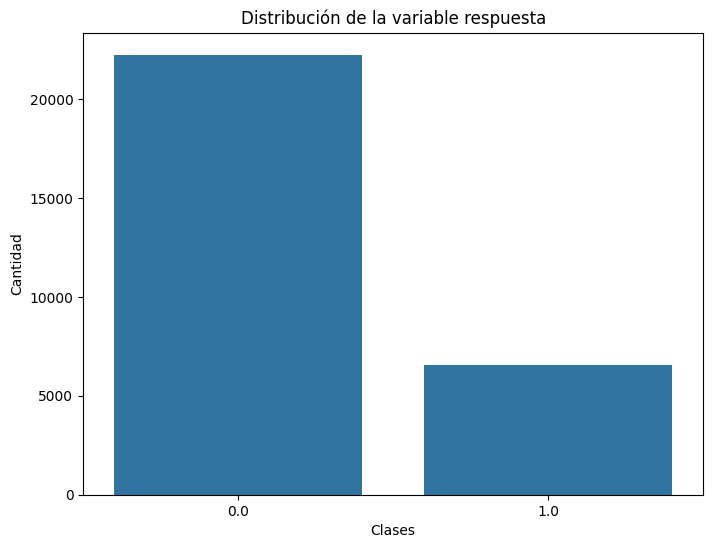

In [30]:
# Visualización del balanceo de la variable respuesta
plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=df_clima2)
plt.title('Distribución de la variable respuesta')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.show()

Observamos que hay un desbalanceo en el dataset, ya que de la variable objetivo, casi un 70% se corresponde a la respuesta "No" (codificada con 0) y un 30% aprox, a la respuesta "Yes" (codificada con 1).

In [31]:
columnas_numéricas = np.array(["MinTemp", 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday'])

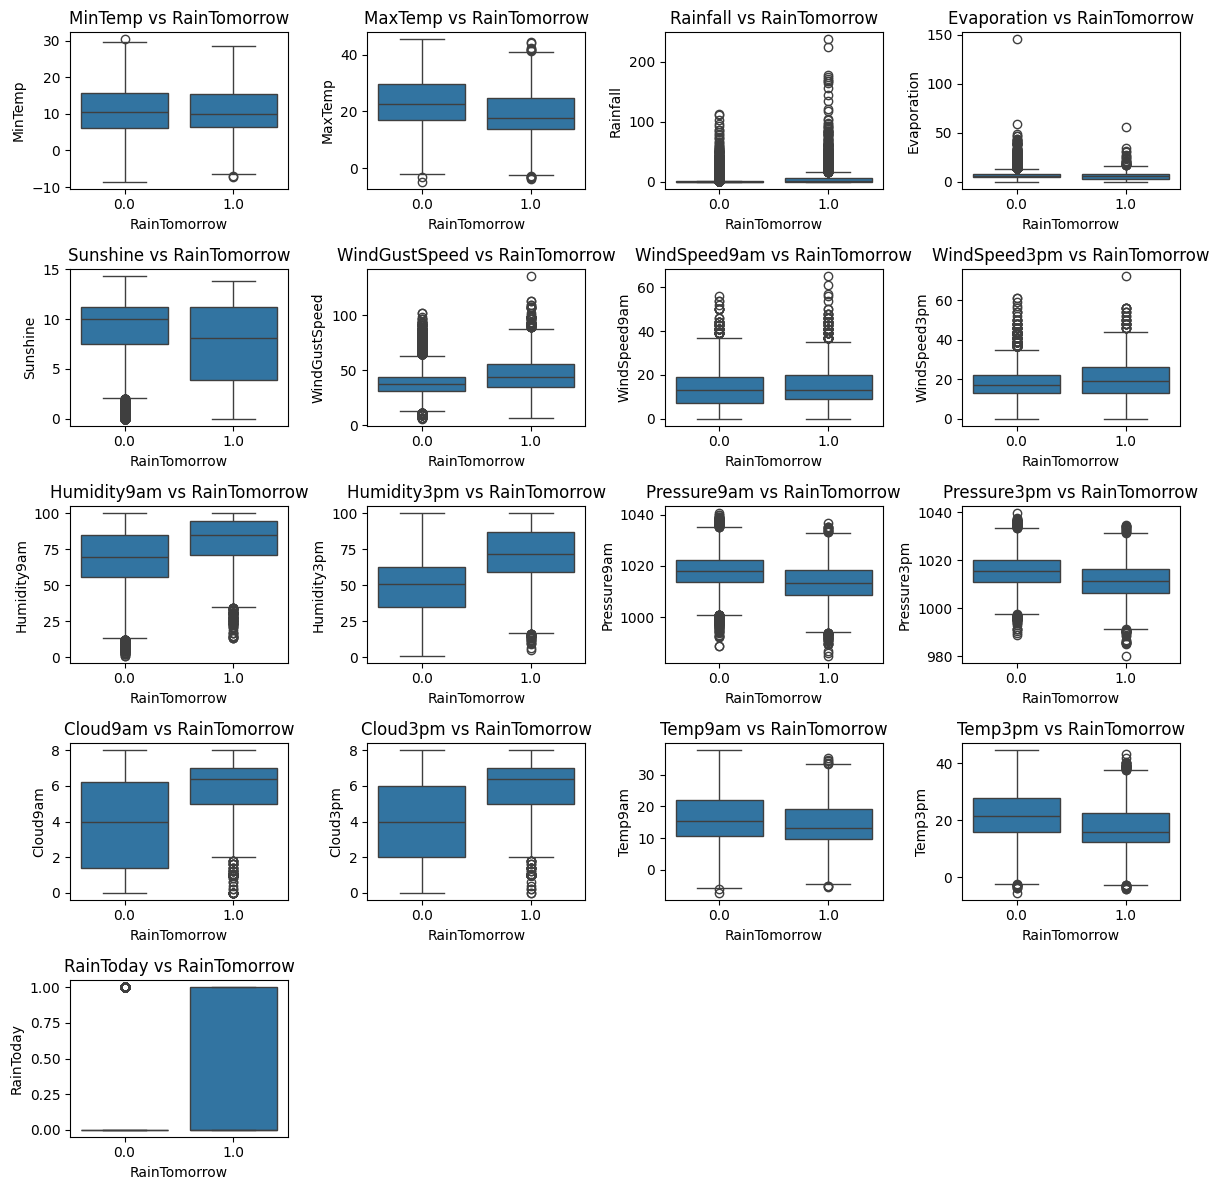

In [32]:
#Realizamos un boxplot para cada variable numérica de X_train en función de la variable respuesta

df_train_num = pd.DataFrame(X_train, columns=columnas_numéricas)
df_train_num['RainTomorrow'] = y_train  # Añade la columna de etiquetas (variable respuesta)

plt.figure(figsize=(12, 12))

# Itera sobre cada columna de X_train y genera un boxplot con respecto a la variable de respuesta
for i, column in enumerate(df_train_num.columns[:-1]):  # Excluye la columna 'target'
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='RainTomorrow', y=column, data=df_train_num)
    plt.title(f'{column} vs RainTomorrow')

plt.tight_layout()
plt.show()

A partir de los boxplots que relacionan a las variables numéricas de nuestro conjunto de entrenamiento con la variable respuesta, podemos observar lo siguiente:


*   Las variables RainFall y Evaporation presentan gran cantidad de valores atípicos, tanto para el valor 0 y 1 de la variable respuesta, que se evidencian en dicho gráfico y lo podemos relacionar con lo que muestran las estadísticas descriptivas obtenidas anteriormente para las variables sin hacer esta distinción de clase. En éstas últimas se observa, por ejemplo, que la variable RainFall tiene una media de aproximadamente 2.4, una mediana de 0, pero alcanza el valor máximo de 236.8, lo que explica la presencia de estos outliers. Algo similar ocurre con la variable Evaporation.

*   Se observan diferencias en la variable Sunshine en relación a cada clase de la variable respuesta. La mediana para la clase 0 es mayor que para la clase 1, así como el primer cuartil. Los valores de la variable Sunshine tienen un rango intercuartil mayor cuando RainTomorrow es igual a 1.

- Para Humidity9am se observa que cuando la variable respuesta es igual a 1, tanto la mediana, como los cuartiles primero y tercero, son mayores.
Se puede decir que cuando sí llueve mañana, los porcentajes de humedad son generalmente más altos.  Para Humidity3pm el comportamiente es similar siendo aún más notoria la diferencia mencionada.

- Para Cloud9am y Cloud3pm, se da una distribución muy parecida entre ellas, donde vemos que cuando no llueve mañana los registros de nubosidad toman valores en su mayoría menores que cuando sí llueve. En ambos casos, la mediana para la clase 0 es 4, y para la clase 1 es mayor a 6.

- Para la relación de las demás variables con RainTomorrow, no se observan grandes diferencias para las distintas clases.


In [33]:
columnas_categoricas = np.array(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
        'RainToday', 'Mes'])

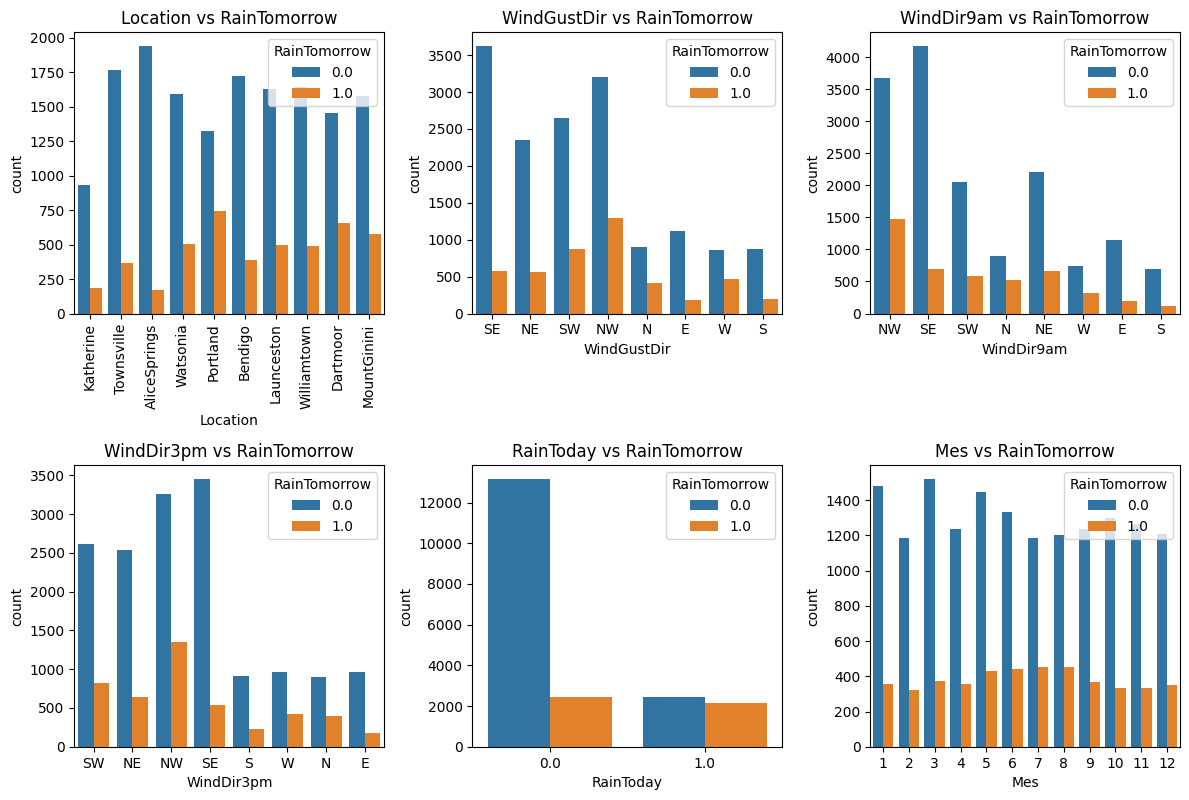

In [34]:
df_train_c = pd.DataFrame(X_train, columns=columnas_categoricas)
df_train_c['RainTomorrow'] = y_train  # Añade la columna de etiquetas (variable respuesta)

plt.figure(figsize=(12, 12))

# Itera sobre cada columna de X_train y genera un boxplot con respecto a la variable de respuesta
for i, column in enumerate(df_train_c.columns[:-1]):  # Excluye la columna 'target'
    plt.subplot(3, 3, i+1)
    sns.countplot(x=column, hue='RainTomorrow', data=df_train_c)
    plt.title(f'{column} vs RainTomorrow')
    if column=="Location":
      plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Se observa en estos gráficos que la frecuencia para cada categoría de las variables es mucho mayor para el caso de la clase 0 que para la clase 1 (tengamos en cuenta el desbalanceo del dataset).
Se puede decir que la ciudad AliceSprings es la que presenta mayor frecuencia para la clase 0 (es decir, no llueve mañana) y la que menor registros de lluvia tiene para la clase 1.
Podemos observar también que cuando la dirección del viento a las 9am y a las 3pm es SE, la frecuencia de la clase 0 es la mayor en relación a las demás direcciones. Se observan pocos registros en general para la dirección SUR del viento en estos horarios.
En la comparación con la variable RainToday vemos que los registros de que sí llueve en el día presente tienen la misma frecuencia para las clases 0 y 1 de 'RainTomorrow'. En cambio, si "hoy no llueve", es mucho más frecuente que al siguiente día tampoco llueva.


In [35]:
nombres_columnas = ["MinTemp", 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', "RainToday", "Mes", "x_mes",	"y_mes",	"x_gust",	"y_gust",	"x_dir9am",	"y_dir9am", "x_dir3pm", "y_dir3pm",
        'Location_AliceSprings', 'Location_Bendigo', 'Location_Dartmoor', 'Location_Katherine', 'Location_Launceston', 'Location_MountGinini',
        'Location_Portland', 'Location_Townsville', 'Location_Watsonia', 'Location_Williamtown']

df_train_num1 = pd.DataFrame(X_train, columns=nombres_columnas)
df_train_num1['RainTomorrow'] = y_train  # Añade la columna de etiquetas (variable respuesta)

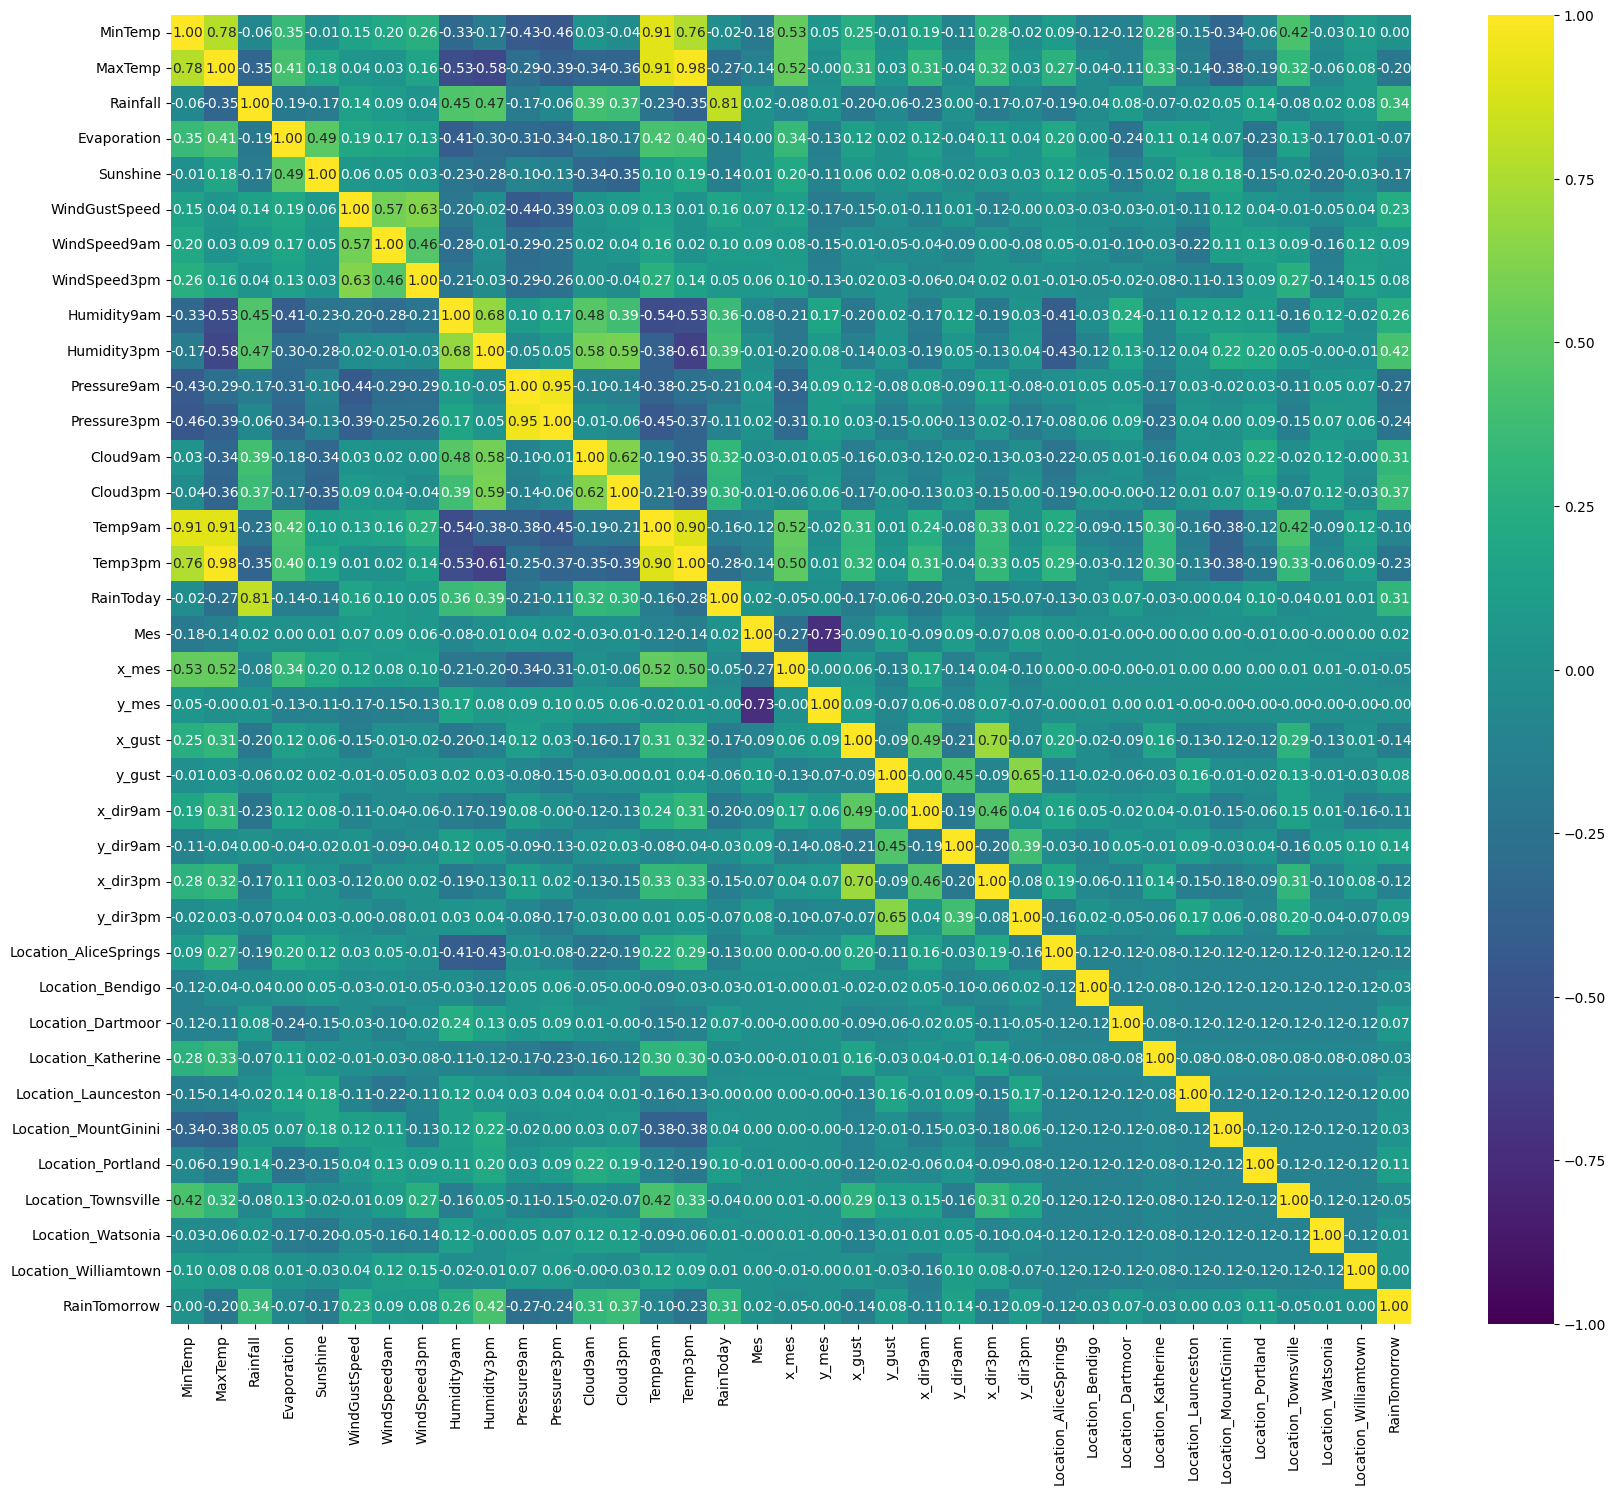

In [36]:
# Matriz de correlación de variables
plt.figure(figsize=(20, 17))
sns.heatmap (df_train_num1.corr(method = 'spearman'), annot = True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1)
plt.show()

No se observan fuertes correlaciones con la variable objetivo: RainTomorrow.
Sí podemos decir que existe fuerte relación lineal entre las variables RainToday-Rainfall, Temp3pm-MaxTemp, Temp9am-MinTemp, Temp9am-MaxTemp, MaxTemp-MinTemp.

##Escalado de datos


A continuación utilizamos el escalado robusto dado que es menos sensible a los valores atípicos y pudimos observar previamente la presencia de outliers en algunas de nuestras variables. El método utiliza la mediana y el rango intercuartil para escalar los datos, por ello le aplicamos el escalado a todo el dataset, sin dejar ninguna variable afuera, pues con este escalado los datos no quedan necesariamente entre 0 y 1.

In [37]:
X_train_numerico = pd.DataFrame(X_train, columns=nombres_columnas)
X_test_numerico = pd.DataFrame(X_test, columns=nombres_columnas)
X_val_numerico = pd.DataFrame(X_val, columns=nombres_columnas)

# Escalamos datos con RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_numerico)
X_test_scaled = scaler.transform(X_test_numerico)
X_val_scaled = scaler.transform(X_val_numerico)

# Miramos las primeras 5 filas del dataframe antes de escalar los datos y luego las 5 primeras filas de la matriz después de escalar
print("Antes del escalado:")
print(X_train_numerico.head())
print("Después del escalado:")
print(X_train_scaled[:5, :])


Antes del escalado:
       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
28543     26.0     36.5       0.0          8.0      6.24           43.0   
20497     20.2     27.2       0.0          9.0     10.50           43.0   
19398      8.2     23.4       0.0          5.2     10.60           30.0   
25819      7.1     29.1       0.0          5.4     10.90           26.0   
24436      0.2     17.7       0.0          5.0     10.70           56.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
28543          19.0          24.0         55.0         53.6  ...   
20497          20.0          31.0         53.0         43.0  ...   
19398          22.0          13.0         34.0         40.0  ...   
25819          13.0           9.0         30.0         15.0  ...   
24436          11.0          24.0         47.0         22.0  ...   

       Location_AliceSprings  Location_Bendigo  Location_Dartmoor  \
28543                    0.0               0.0     

##Implementación de la solución del problema de clasificación con regresión logística

In [38]:
#Balanceo de datos con oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled1, y_resampled1 = oversampler.fit_resample(X_train_scaled, y_train)

In [39]:
y_resampled1.value_counts()

,count
RainTomorrow,
1.0,15591
0.0,15591


In [40]:
# Aplicamos regresión logística
model1 = LogisticRegression(random_state=42)
model1.fit(X_resampled1, y_resampled1)
y_pred1 = model1.predict(X_test_scaled)
y_ajuste_train1 = model1.predict(X_resampled1)

print('Métricas en el entrenamiento')
print(classification_report(y_resampled1, y_ajuste_train1))
print(confusion_matrix(y_resampled1, y_ajuste_train1))

print('Métricas en el conjunto de prueba')
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

Métricas en el entrenamiento
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79     15591
         1.0       0.79      0.79      0.79     15591

    accuracy                           0.79     31182
   macro avg       0.79      0.79      0.79     31182
weighted avg       0.79      0.79      0.79     31182

[[12411  3180]
 [ 3286 12305]]
Métricas en el conjunto de prueba
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86      4435
         1.0       0.54      0.80      0.64      1328

    accuracy                           0.80      5763
   macro avg       0.73      0.80      0.75      5763
weighted avg       0.84      0.80      0.81      5763

[[3523  912]
 [ 265 1063]]


En la matriz de confusión para entrenamiento observamos que hay 3180 falsos positivos (FP) y 3286 falsos negativos (FN). Esto quiere decir que 3180 veces se predijo que sí llovería mañana cuando en realidad no ocurrió. De manera similar, 3286 veces se predijo que no llovería mañana y sí llovió.

Estos valores disminuyen para el caso del conjunto de prueba: 912 veces se predijo que sí llovería cuando no fue así (FP), mientras que 265 llovió al día siguiente a pesar de que la predicción fue que no.

In [41]:
len(y_resampled1[y_resampled1==1]), len(y_resampled1[y_resampled1==0])

(15591, 15591)

Umbral óptimo (Distancia mínima al punto (0,1)): 0.4786728152514939


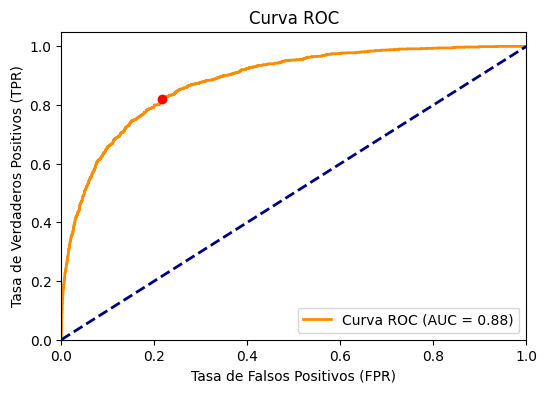

In [42]:
# Obtenemos las probabilidades de predicción del modelo
y_probs1 = model1.predict_proba(X_test_scaled)[:, 1]

# Calculamos la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs1)
roc_auc = auc(fpr, tpr)


# Calculamos la distancia euclidiana entre cada punto de la curva ROC y el punto ideal (0, 1)
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)

# Enconteamos el índice del umbral con la menor distancia
min_distance_index = np.argmin(distances)

# Umbral óptimo
optimal_threshold = thresholds[min_distance_index]
print(f"Umbral óptimo (Distancia mínima al punto (0,1)): {optimal_threshold}")

# Graficamos la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.scatter(fpr[min_distance_index], tpr[min_distance_index], color='red', label=f'Umbral óptimo = {optimal_threshold:.2f}', zorder=5)
plt.show()

Observamos que la curva ROC queda por encima de la diagonal, con un área bajo la curva de 0.88, que es cercana a 1. Esto implicaría un buen fitting.

## Implementación de un modelo base

### Modelo base: Clasificación por moda, según mes

In [48]:
#Definimos un modelo que clasifique por la moda de cada mes:
class ModaPorMesClasificador(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        # Guardamos los datos como un dataframe para manipular la columna de 'mes'
        data = pd.DataFrame(X).copy()
        data['RainTomorrow'] = y
        # Calculamos la moda por mes y las probabilidades:
        self.moda_por_mes_ = data.groupby('Mes')['RainTomorrow'].apply(lambda x: x.mode()[0])
        self.proba_por_mes_ = data.groupby('Mes')['RainTomorrow'].mean()  # Probabilidad de lluvia por mes
        return self

    def predict(self, X):
        # Para predecir, asignamos la moda correspondiente al mes de cada fila
        data = pd.DataFrame(X).copy()
        return data['Mes'].map(self.moda_por_mes_).values

    def predict_proba(self, X):
        # Asignamos la probabilidad correspondiente al mes de cada fila
        data = pd.DataFrame(X).copy()
        return data['Mes'].map(self.proba_por_mes_).values.reshape(-1, 1)

In [49]:
# Convertimos a dF
X_resampled_df = pd.DataFrame(X_resampled1, columns= nombres_columnas)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=nombres_columnas)
# Entrenamos el modelo
modelo_moda_por_mes = ModaPorMesClasificador()
modelo_moda_por_mes.fit(X_resampled_df, y_resampled1)

# Predicción con modelo base:
y_pred_base = modelo_moda_por_mes.predict(X_test_scaled_df)

# Calcula la accuracy del modelo
accuracy = accuracy_score(y_test, y_pred_base)
print(f"Exactitud del modelo por moda por mes: {accuracy:.4f}")

Exactitud del modelo por moda por mes: 0.5275


In [50]:
y_ajuste_train_base = modelo_moda_por_mes.predict(X_resampled_df)

print("Métricas en el entrenamiento")
print(classification_report(y_resampled1, y_ajuste_train_base))
print(confusion_matrix(y_resampled1, y_ajuste_train_base))

print('Métricas en el conjunto de prueba')
print(classification_report(y_test, y_pred_base))
print(confusion_matrix(y_test, y_pred_base))

Métricas en el entrenamiento
              precision    recall  f1-score   support

         0.0       0.53      0.51      0.52     15591
         1.0       0.53      0.55      0.54     15591

    accuracy                           0.53     31182
   macro avg       0.53      0.53      0.53     31182
weighted avg       0.53      0.53      0.53     31182

[[7954 7637]
 [6954 8637]]
Métricas en el conjunto de prueba
              precision    recall  f1-score   support

         0.0       0.80      0.51      0.63      4435
         1.0       0.26      0.57      0.36      1328

    accuracy                           0.53      5763
   macro avg       0.53      0.54      0.49      5763
weighted avg       0.68      0.53      0.56      5763

[[2283 2152]
 [ 571  757]]


En este modelo base, la cantidad de FP para el modelo de entrenamiento es 7637, mientras que para el conjunto de prueba es 2152. Por otro lado, la cantidad de FN para entrenamiento es 6954 y 571 para prueba.

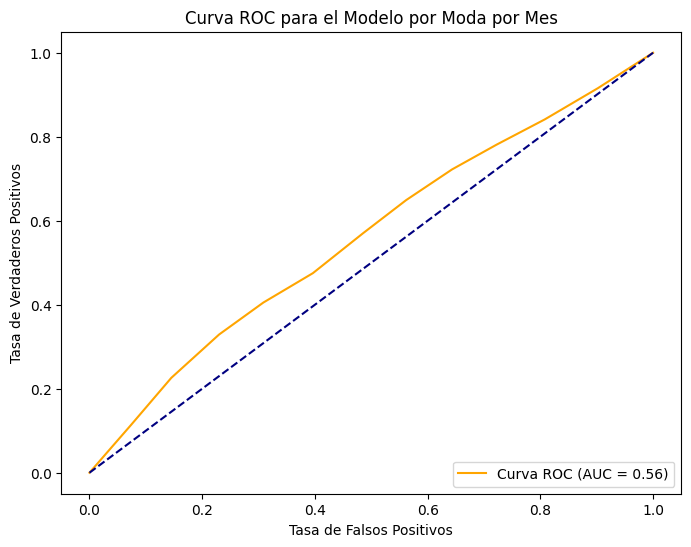

In [51]:
# Calculamos las probabilidades de la clase positiva
y_proba_base = modelo_moda_por_mes.predict_proba(X_test_scaled_df)

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_base)
roc_auc = auc(fpr, tpr)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para el Modelo por Moda por Mes')
plt.legend(loc="lower right")
plt.show()

La curva ROC se encuentra por encima de la recta identidad pero no tanto como la curva ROC correspondiente a regresión logística.

In [52]:
# Calculamos la distancia euclidiana entre cada punto de la curva ROC y el punto ideal (0, 1)
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)
min_distance_index = np.argmin(distances)
optimal_threshold = thresholds[min_distance_index]
print(f"Umbral óptimo (Distancia mínima al punto (0,1)): {optimal_threshold}")

Umbral óptimo (Distancia mínima al punto (0,1)): 0.5005181347150259


Comparando los dos modelos de clasificación, el de regresión logística y el modelo base de clasificación por moda según el mes, vemos que logramos mejor fitting con el primero, dado que las métricas en general son mejores en el primer caso y además el área bajo la curva ROC es mayor, 0.88 contra 0.56 en el segundo caso.